In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"D:\Datasets\Titanic\train.csv")
test = pd.read_csv(r"D:\Datasets\Titanic\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.drop(['Cabin'],axis = 1,inplace = True)
test.drop(['Cabin'],axis = 1,inplace = True)

In [8]:
train['Embarked'].fillna('S',inplace = True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [9]:
test[test['Fare'].isnull()].index.tolist()

[152]

In [10]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object

In [11]:
print(test.groupby('Pclass').mean())  

        PassengerId        Age     SibSp     Parch       Fare
Pclass                                                       
1       1098.224299  40.918367  0.476636  0.383178  94.280297
2       1117.935484  28.777500  0.376344  0.344086  22.202104
3       1094.178899  24.027945  0.463303  0.417431  12.459678


we have grouped the data by Pclass and as the null value of fare is from Pclass 3, we will use 12.459678 as the value

In [12]:
test['Fare'].fillna(12.459678,inplace = True)
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [13]:
# to fill age, we are generating random numbers in the range mean-sigma, mean+sigma and taking values in it

train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [14]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [15]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\Apoorv\AppData\Local\Temp/ipykernel_2964/1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [16]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
test['Age'][test['Age'].isnull()] = test_age

C:\Users\Apoorv\AppData\Local\Temp/ipykernel_2964/4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [18]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#EDA

<AxesSubplot:>

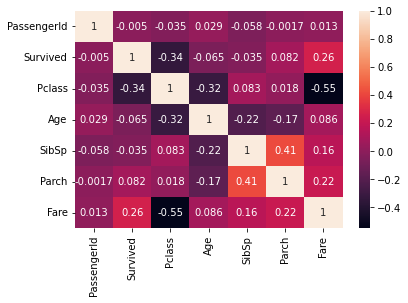

In [20]:
sns.heatmap(train.corr(),annot = True)

In [21]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

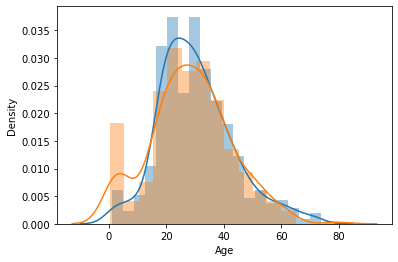

In [22]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

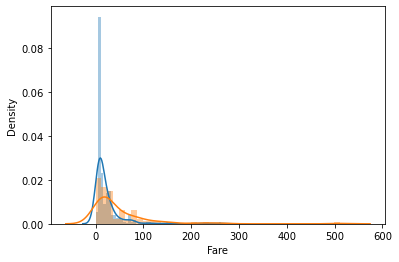

In [23]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [24]:
train.drop('Ticket',axis = 1,inplace = True)
test.drop('Ticket',axis = 1,inplace = True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [26]:
train['family'] = train['SibSp']+train['Parch']+1

In [27]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [28]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [29]:
test['family'] = test['SibSp']+test['Parch']+1

In [30]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [31]:
train['family_size'] = train['family'].apply(cal)

In [32]:
test['family_size'] = test['family'].apply(cal)

In [33]:
train['family_size'].value_counts()

Alone     537
Medium    292
Large      62
Name: family_size, dtype: int64

In [34]:
train.drop(['SibSp','Parch','family'],axis=1,inplace = True)
test.drop(['SibSp','Parch','family'],axis=1,inplace = True)

In [35]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [36]:
passengerID = test['PassengerId'].values

In [38]:
train.drop(['Name','PassengerId','Fare'],axis=1,inplace = True)
test.drop(['Name','PassengerId','Fare'],axis=1,inplace = True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    object 
 5   family_size  891 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [40]:
train = pd.get_dummies(train,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [41]:
train.shape

(891, 9)

In [42]:
test = pd.get_dummies(test,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [43]:
test.shape

(418, 8)

In [44]:
feature = train.drop(['Survived'],axis = 1)
target = train['Survived']

In [45]:
from sklearn.model_selection import train_test_split as split

In [46]:
X_train,X_test,y_train,y_test = split(feature,target,test_size =0.2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [48]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_pred,y_test)

0.8324022346368715

### Checking on test data

In [52]:
Xf = test

In [53]:
yf = clf.predict(Xf)

In [54]:
yf.shape , passengerID.shape

((418,), (418,))

In [55]:
final = pd.DataFrame()

In [56]:
final

""


In [57]:
final['passengerId'] = passengerID
final['survived'] = yf

In [ ]:
final.replace({0:})

In [58]:
final.head()

,passengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
final.to_csv('Submission2.csv',index = False)